<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C7/Clase7_1_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [1]:
#install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(arules)
library(dplyr)


In [4]:
data(Groceries)

In [5]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [6]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [7]:
inspect(head(Groceries,6))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [ ]:
?transactions

In [8]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [9]:
mean(size(Groceries))

[1] 4.409456

In [10]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [11]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [ ]:
class(Groceries)

In [12]:
?eclat


In [13]:
frequentItems <- eclat(Groceries,
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [14]:
frequentItems

set of 122 itemsets 

In [15]:
inspect(frequentItems)

      items                                           support    count
[1]   {whole milk, frozen vegetables}                 0.02043721  201 
[2]   {beef, whole milk}                              0.02125064  209 
[3]   {whole milk, curd}                              0.02613116  257 
[4]   {pork, whole milk}                              0.02216573  218 
[5]   {pork, other vegetables}                        0.02165735  213 
[6]   {frankfurter, whole milk}                       0.02053889  202 
[7]   {whole milk, bottled beer}                      0.02043721  201 
[8]   {whole milk, brown bread}                       0.02521607  248 
[9]   {whole milk, margarine}                         0.02419929  238 
[10]  {whole milk, butter}                            0.02755465  271 
[11]  {other vegetables, butter}                      0.02003050  197 
[12]  {whole milk, newspapers}                        0.02735130  269 
[13]  {whole milk, domestic eggs}                     0.02999492  295 
[14]  

In [21]:
inspect(sort(frequentItems, by="support"))

      items                                           support    count
[1]   {whole milk}                                    0.25551601 2513 
[2]   {other vegetables}                              0.19349263 1903 
[3]   {rolls/buns}                                    0.18393493 1809 
[4]   {soda}                                          0.17437722 1715 
[5]   {yogurt}                                        0.13950178 1372 
[6]   {bottled water}                                 0.11052364 1087 
[7]   {root vegetables}                               0.10899847 1072 
[8]   {tropical fruit}                                0.10493137 1032 
[9]   {shopping bags}                                 0.09852567  969 
[10]  {sausage}                                       0.09395018  924 
[11]  {pastry}                                        0.08896797  875 
[12]  {citrus fruit}                                  0.08276563  814 
[13]  {bottled beer}                                  0.08052872  792 
[14]  

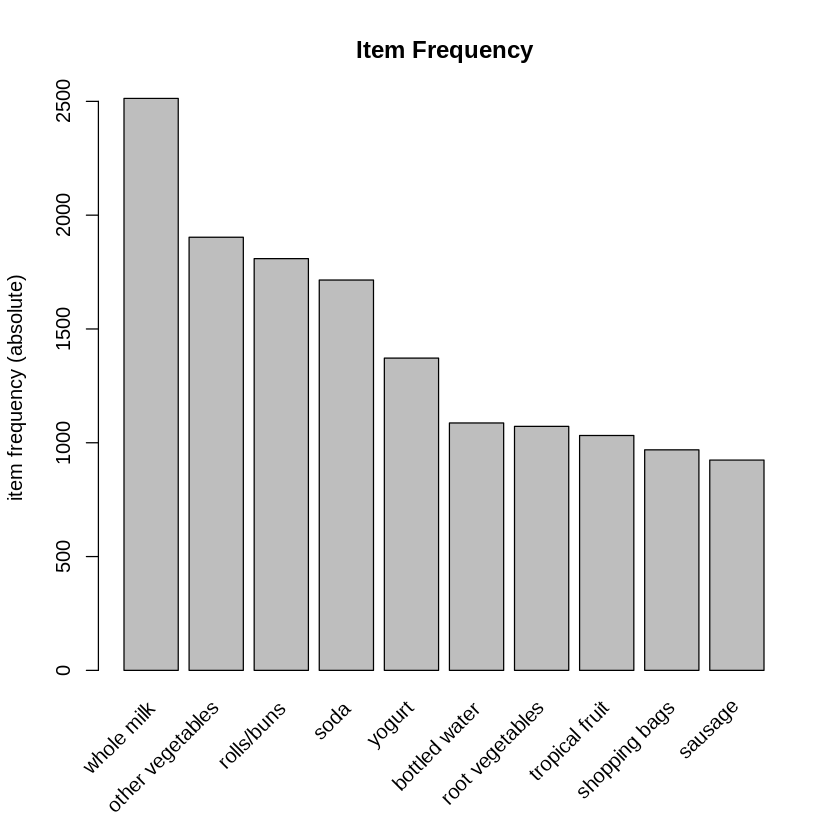

In [22]:
itemFrequencyPlot(Groceries,
                  topN=10,
                  type="absolute",
                  main="Item Frequency") #podemos graficar los items frecuentes

## ¿Cómo determinamos las reglas?

In [23]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [24]:
rules

set of 472 rules 

In [ ]:
length(rules)

In [27]:
inspect(rules)
0.01159126/0.02796136 #0.41454545 , 0.414545644417868

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

[1] 0.4145456

In [45]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries,
                  parameter =list (supp=0.05,conf = 0.10, minlen = 2),
                  #appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=F))

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 6 rules 

In [46]:
inspect(rules)

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[4] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
[5] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[6] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.205032 557  
[4] 1.205032 557  
[5] 1.513634 736  
[6] 1.513634 736  


In [30]:
rules_conf <- sort(rules,
                   by="lift",
                   decreasing=TRUE) # ordenando por confidence rules.

In [31]:
rules
inspect(rules_conf)

set of 6 rules 

    lhs                   rhs                support    confidence coverage 
[1] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[2] {whole milk}       => {yogurt}           0.05602440 0.2192598  0.2555160
[3] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[4] {whole milk}       => {other vegetables} 0.07483477 0.2928770  0.2555160
[5] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[6] {whole milk}       => {rolls/buns}       0.05663447 0.2216474  0.2555160
    lift     count
[1] 1.571735 551  
[2] 1.571735 551  
[3] 1.513634 736  
[4] 1.513634 736  
[5] 1.205032 557  
[6] 1.205032 557  


## Transformación a objetos de clase transaction





In [32]:
 ?transactions

In [33]:
## Example 1: creating transactions form a list (each element is a transaction)
     a_list <- list(
           c("a","b","c"),
           c("a","b"),
           c("a","b","d"),
           c("c","e"),
           c("a","b","d","e")
           )

     ## Set transaction names
     names(a_list) <- paste("Tr", c(1:5), sep = "")
     a_list


$Tr1
[1] "a" "b" "c"

$Tr2
[1] "a" "b"

$Tr3
[1] "a" "b" "d"

$Tr4
[1] "c" "e"

$Tr5
[1] "a" "b" "d" "e"

In [34]:
as(a_list, "transactions")


transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

In [35]:
trans1 <- transactions(a_list)
trans1

transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

In [36]:
## Example 2: creating transactions from a 0-1 matrix with 5 transactions (rows) and
     ##            5 items (columns)
     a_matrix <- matrix(
       c(1, 1, 1, 0, 0,
                1, 1, 0, 0, 0,
                1, 1, 0, 1, 0,
                0, 0, 1, 0, 1,
                1, 1, 0, 1, 1), ncol = 5)

     ## Set item names (columns) and transaction labels (rows)
     colnames(a_matrix) <- c("a", "b", "c", "d", "e")
     rownames(a_matrix) <- paste("Tr", c(1:5), sep = "")

     a_matrix

,a,b,c,d,e
Tr1,1,1,1,0,1
Tr2,1,1,1,0,1
Tr3,1,0,0,1,0
Tr4,0,0,1,0,1
Tr5,0,0,0,1,1


In [37]:
trans2 <- transactions(a_matrix)
trans2
inspect(trans2)

transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

    items        transactionID
[1] {a, b, c, e} Tr1          
[2] {a, b, c, e} Tr2          
[3] {a, d}       Tr3          
[4] {c, e}       Tr4          
[5] {d, e}       Tr5          


In [39]:
## Example 4: creating transactions from a data.frame with
     ## transaction IDs and items (long format)
     a_df3 <- data.frame(
       trx_id =  c( 1,   1,   2,   2,   2,   3 ),
       item_trx = c("a", "b", "a", "b", "c", "b")
     )
     a_df3

trx_id,item_trx
<dbl>,<chr>
1,a
1,b
2,a
2,b
2,c
3,b


In [40]:
trans4 <- transactions(a_df3, format = "long", cols = c("trx_id", "item_trx"))
trans4
inspect(trans4)

transactions in sparse format with
 3 transactions (rows) and
 3 items (columns)

    items     transactionID
[1] {a, b}    1            
[2] {a, b, c} 2            
[3] {b}       3            


In [41]:
# NOTA
## Example 3: creating transactions from data.frame (wide format)
     a_df <- data.frame(
             age   = as.factor(c( 6,   8,   NA, 9,   16)),
             grade = as.factor(c("A", "C", "F", NA, "C")),
       pass  = c(TRUE, TRUE, FALSE, TRUE, TRUE))
     ## Note: factors are translated differently than logicals and NAs are ignored
     a_df



age,grade,pass
<fct>,<fct>,<lgl>
6,A,TRUE
8,C,TRUE
NA,F,FALSE
9,NA,TRUE
16,C,TRUE


In [42]:
  ## Create transactions
     trans3 <- transactions(a_df)
     inspect(trans3)

    items                   transactionID
[1] {age=6, grade=A, pass}  1            
[2] {age=8, grade=C, pass}  2            
[3] {grade=F}               3            
[4] {age=9, pass}           4            
[5] {age=16, grade=C, pass} 5            
